In [5]:
import matplotlib.pyplot as plt
import scipy
import numpy as np

In [6]:
def f(t, v0, h0):
    displacement = v0*t + 0.5*(-9.8)*(t**2)
    return h0 + displacement

In [7]:
f(0, 0, 9)

9.0

In [199]:
t0 = 0
x0 = 10
v0 = 0
F = -9.8
m = 1
dt = .1
num_samples = 20

In [200]:
t = t0

actual_heights = np.zeros(num_samples)
for i in range(num_samples):
    actual_heights[i] = f(t, v0, x0)
    t = t + dt

In [201]:
x = x0
v = v0
t = t0

euler_heights = np.zeros(num_samples)
for i in range(num_samples):
    euler_heights[i] = x
    v = v + (F/m)*dt
    x = x + v*dt

In [202]:
x = x0
v = v0
t = t0
    
rk4_heights = np.zeros(num_samples)
for i in range(num_samples):
    rk4_heights[i] = x
    
    k1 = F/m
    k2 = F/m
    k3 = F/m
    k4 = F/m
    
    v = v + (dt/6)*(k1 + 2*k2 + 2*k3 + k4)
    
    k1 = dt*v
    k2 = dt*(v + 0.5*k1)
    k3 = dt*(v + 0.5*k2)
    k4 = dt*(v + k3)
    x = x + (1/6)*(k1 + 2*k2 + 2*k3 + k4)
    
    t = t + dt

print(rk4_heights)

[ 10.           9.89693258   9.69079775   9.3815955    8.96932583
   8.45398875   7.83558425   7.11411233   6.289573     5.36196625
   4.33129208   3.1975505    1.9607415    0.62086508  -0.82207875  -2.36809
  -4.01716867  -5.76931475  -7.62452825  -9.58280917]


In [206]:
def dxdt(t, state):
    return state[1]

def dvdt(t, state):
    return F/m

state = np.array([x0, v0])
update_funcs = np.array([dxdt, dvdt])

def update_f(t, state):
    return np.array([state[1], F/m])

class RK4Solver:
    def __init__(self, state, update_f, initial_t, dt):
        self.state = state
        self.update_f = update_f
        self.t = initial_t
        self.dt = dt
    
    def update(self):
        k1 = self.update_f(self.t, self.state)
        k2 = self.update_f(self.t+0.5*dt, self.state+dt*0.5*k1)
        k3 = self.update_f(self.t+0.5*dt, self.state+dt*0.5*k2)
        k4 = self.update_f(self.t+dt, self.state+dt*k3)
        self.state = self.state + (dt/6)*(k1 + 2*k2 + 2*k3 + k4)
        self.t = self.t + dt
        
solver = RK4Solver(state, update_f, t0, dt)
solver_heights = np.zeros(num_samples)
for i in range(num_samples):
    solver_heights[i] = solver.state[0]
    solver.update()
    
# print(solver_heights)


In [207]:
t = 0
heights = np.zeros(num_samples)
for i in range(num_samples):
    heights[i] = f(t, 0, x0)
    t += dt

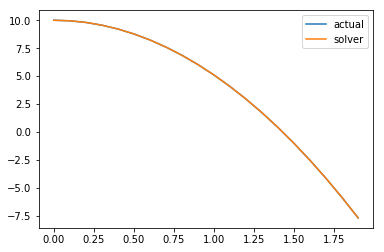

In [209]:
#plt.plot(heights, label='actual')
t = t0
xs = np.zeros(num_samples)

for i in range(num_samples):
    xs[i] = t
    t = t + dt

plt.plot(xs, actual_heights, label='actual')
# plt.plot(xs, euler_heights, label='euler')
# plt.plot(xs, rk4_heights, label='rk4')
plt.plot(xs, solver_heights, label='solver')
plt.legend()
plt.show()

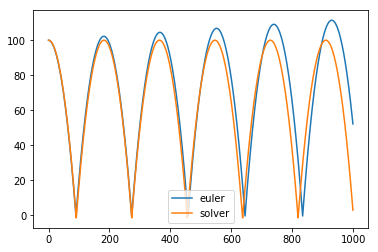

In [210]:
ball_height = 100
ball_v = 0

def dhdt(t, state):
#     if (state[0] < 0):
#         return -state[1]
    return state[1]

def dvdt(t, state):
    return -9.8

def update_f(t, state):
    return np.array([state[1], -9.8])

#fs = np.array([dhdt, dvdt])

num_samples = 1000
dt = 0.05

solver = RK4Solver([ball_height, ball_v], update_f, 0, dt)
ball_heights = np.zeros(num_samples)
for i in range(num_samples):
    #     print(solver.state)
    ball_heights[i] = solver.state[0]

    if (solver.state[0] < 0):
        solver.state[1] = -solver.state[1]
        
    solver.update()

euler_heights = np.zeros(num_samples)
x = ball_height
v = ball_v
for i in range(num_samples):
    if x <= 0:
        v = -v
    
    x += v*dt
    v += -9.8*dt
    
    euler_heights[i] = x
    
plt.plot([x for x in range(num_samples)], euler_heights, label='euler')
plt.plot([x for x in range(num_samples)], ball_heights, label='solver')
plt.legend()
plt.show()

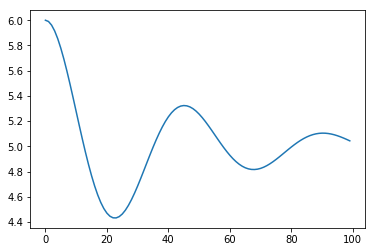

In [211]:
spring_rest_len = 5.
k = 2.
pos0 = 6.
v0 = 0.
t0 = 0.
dt = 0.1
c = .5
state = np.array([pos0, v0])

def dposdt(t, state):
    return state[1]

def dvdt(t, state):
    return -k * (state[0]-spring_rest_len) - c*state[1]

fs = [dposdt, dvdt]

def update_f(t, state):
    return np.array([state[1], -k * (state[0]-spring_rest_len) - c*state[1]])

num_samples = 100
positions = np.zeros(num_samples)
solver = RK4Solver(state, update_f, t0, dt)
for i in range(num_samples):
    positions[i] = solver.state[0]
    solver.update()
    
plt.plot([x for x in range(num_samples)], positions)
plt.show()